
# Load recording information into RecordingExtractor objects

The :code:`RecordingExtractor` is the basic class for handling recorded data. Here is how it works.



In [3]:
import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
import warnings
warnings.filterwarnings('ignore')

We will create a :code:`RecordingExtractor` object from scratch using :code:`numpy` and the
:code:`NumpyRecordingExtractor`

Let's define the properties of the dataset



## Create numpy array to store electrode array data!

In [4]:
# get ".mat" file
os.chdir(os.path.realpath('/Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output'))
data = loadmat('/Users/betty_hbr/Dropbox/1_Project3/2_Workspace/Rat_04_June_22_Block3.mat')

# create output dir
strings = ['>Spike_Rat_04_June_22_Block3']
def make_directories(input_list):
    for string in input_list:
        dirpath = os.path.join('./', string[1:])
        try:
            os.mkdir(dirpath)
        except FileExistsError:
            print('Directory {} already exists'.format(dirpath))
        else:
            print('Directory {} created'.format(dirpath))

make_directories(strings)
output_folder = [os.getcwd(),'/',strings[0][1:]]
output_folder = os.path.join(os.getcwd(),strings[0][1:])
print(output_folder)

# create a "RecordingExtractor" object using "numpy" and the "NumpyRecordingExtrator"
timeseries = data['Rat_04_June_22_Block3'] # get all channels from dataset
num_channels = timeseries.shape[0]
num_timepoints = timeseries.shape[1]
geom = np.zeros((num_channels, 2))
geom[:, 0] = range(num_channels)
sampling_frequency=24414

Directory ./Spike_Rat_04_June_22_Block3 already exists
/Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output/Spike_Rat_04_June_22_Block3


In [5]:
print(output_folder)

/Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output/Spike_Rat_04_June_22_Block3


And instantiate a :code:`NumpyRecordingExtractor`:
then to print the `recordings` feature


In [6]:
recording = se.NumpyRecording(traces_list=np.transpose(timeseries), sampling_frequency=sampling_frequency)
print(recording)
print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording.get_num_frames()))
# print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
# print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))

NumpyRecording: 16 channels - 1 segments - 24.4kHz - 60.737s
Num. channels = 16
Sampling frequency = 24414 Hz
Num. timepoints = 1482838


Take a subset of channels if needed, print the properties of `recording_sub` 

In [7]:
recording_sub = recording.channel_slice(channel_ids=range(16),renamed_channel_ids=None)
print('Num. channels = {}'.format(len(recording_sub.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording_sub.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording_sub.get_num_frames()))

Num. channels = 16
Sampling frequency = 24414 Hz
Num. timepoints = 1482838


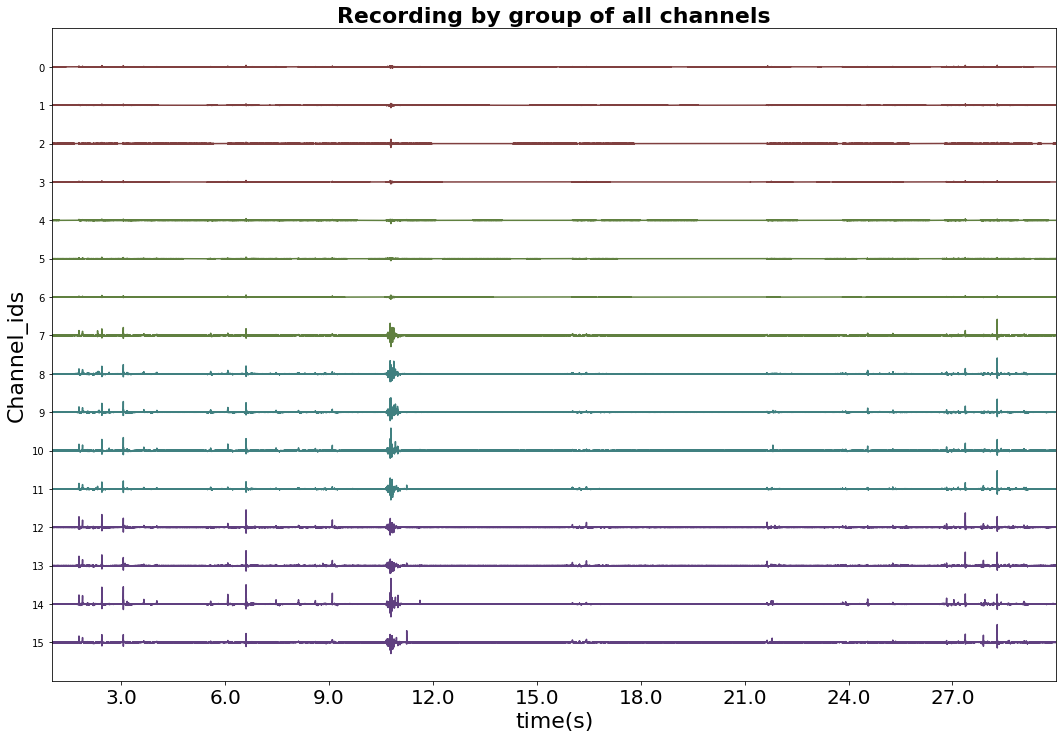

In [8]:
recording = recording_sub.clone()
recording.set_channel_groups(channel_ids=recording.get_channel_ids(),
                            groups=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3])
w_ts = sw.plot_timeseries(recording,
                          time_range=[1,30], 
                          show_channel_ids=True,
                          color_groups=True)

w_ts.ax.set_title("Recording by group of all channels", fontsize=22, fontweight='bold')
w_ts.ax.set_xlabel("time(s)",fontsize=22)
w_ts.ax.set_xticklabels(w_ts.ax.get_xticks(), fontsize=20)
w_ts.ax.set_ylabel("Channel_ids",fontsize=22)
w_ts.figure.set_size_inches(18, 12, forward=True)

w_ts.figure.savefig(output_folder + '/Recording by group of all channels.png', dpi=200)


In [9]:
# fs = sampling_frequency
# trace_snippet = recording.get_traces(start_frame=int(fs*10), end_frame=int(fs*20))
# print('Traces shape:', trace_snippet.shape)
# # display traces
# w_ts = sw.plot_timeseries(recording, 
#                           channel_ids=[2,3,4,5,6], 
#                           time_range=[1,30], 
#                           show_channel_ids=True, 
#                           color_groups=True)

# w_ts.ax.set_title("Recording by group of selected channels", fontsize=20, fontweight='bold')
# w_ts.ax.set_xlabel("time(s)",fontsize=22)
# w_ts.ax.set_xticklabels(w_ts.ax.get_xticks(), fontsize=20)

# w_ts.ax.set_ylabel("Channel_ids",fontsize=22)

# w_ts.figure.set_size_inches(18, 12, forward=True)

# w_ts.figure.savefig(output_folder + '/Recording by group of selected channels.png', dpi=200)



## Create probe information using "probeinterface" package

In [10]:
import probeinterface as pi
from probeinterface import Probe, ProbeGroup
from probeinterface.plotting import plot_probe, plot_probe_group

,probe_index,x,y,contact_shapes,radius
0,0,1.000000e+01,0.000000e+00,circle,6.0
1,0,6.123234e-16,1.000000e+01,circle,6.0
2,0,-1.000000e+01,1.224647e-15,circle,6.0
3,0,-1.836970e-15,-1.000000e+01,circle,6.0
4,1,1.000000e+01,3.600000e+02,circle,6.0
5,1,6.123234e-16,3.700000e+02,circle,6.0
6,1,-1.000000e+01,3.600000e+02,circle,6.0
7,1,-1.836970e-15,3.500000e+02,circle,6.0
8,2,3.700000e+02,0.000000e+00,circle,6.0
9,2,3.600000e+02,1.000000e+01,circle,6.0


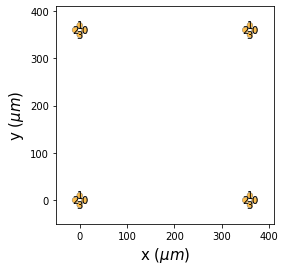

In [11]:
# generate 4 tetrodes:
from probeinterface import generate_tetrode

probegroup = ProbeGroup()
for i in range(2):
    for j in range(2):
        tetrode = generate_tetrode()
        tetrode.move([i * 360, j * 360])
        probegroup.add_probe(tetrode)
probegroup.set_global_device_channel_indices(np.arange(16))
plot_probe_group(probegroup, with_channel_index=True, same_axes=True)
probegroup.to_dataframe(complete=True).loc[:,["probe_index","x","y","contact_shapes","radius"]]


In [12]:
probe_name = '2x2x4_tetrode'
pi.write_prb(f"{probe_name}.prb", probegroup, group_mode="by_shank")
!cat 2x2x4_tetrode.prb

channel_groups = {
    0:
        {
           'channels': [0, 1, 2, 3],
           'geometry':  {
               0: [10.0, 0.0],
               1: [6.123233995736766e-16, 10.0],
               2: [-10.0, 1.2246467991473533e-15],
               3: [-1.8369701987210296e-15, -10.0],
           }
       },
    1:
        {
           'channels': [4, 5, 6, 7],
           'geometry':  {
               4: [10.0, 360.0],
               5: [6.123233995736766e-16, 370.0],
               6: [-10.0, 360.0],
               7: [-1.8369701987210296e-15, 350.0],
           }
       },
    2:
        {
           'channels': [8, 9, 10, 11],
           'geometry':  {
               8: [370.0, 0.0],
               9: [360.0, 10.0],
               10: [350.0, 1.2246467991473533e-15],
               11: [360.0, -10.0],
           }
       },
    3:
        {
           'channels': [12, 13, 14, 15],
           'geometry':  {
               12: [370.0, 360.0],

               14: [350.0, 360.0],
           

In [13]:
# This will return a new recording file structure that contains the probe information
# recording_prb = recording.load_probe_file("2x2x4_tetrode.prb") 

In [14]:
recording_prb=recording.set_probegroup(probegroup, group_mode='by_probe')

In [107]:
# recording = recording_prb.split_by(property='group')

In [109]:
print(f'Original channels: {recording.get_channel_ids()}')
print(f'Channels after loading the probe file: {recording_prb.get_channel_ids()}')
print(f'Channel groups after loading the probe file: {recording_prb.get_channel_groups()}')

Original channels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Channels after loading the probe file: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Channel groups after loading the probe file: [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]


## Preprocessing recordings

We can check which properties are in the extractor as follows:


In [112]:
print(recording)

{0: ChannelSliceRecording: 4 channels - 1 segments - 24.4kHz - 60.737s, 1: ChannelSliceRecording: 4 channels - 1 segments - 24.4kHz - 60.737s, 2: ChannelSliceRecording: 4 channels - 1 segments - 24.4kHz - 60.737s, 3: ChannelSliceRecording: 4 channels - 1 segments - 24.4kHz - 60.737s}


We can add some new properties. The first 8 channels are in the lateral side, the second 8 are in the medial part.

In [113]:
property_values = ['lateral']*8 + ['medial']*8
print(property_values)
recording.set_property(key='medial_lateral', values=property_values)

['lateral', 'lateral', 'lateral', 'lateral', 'lateral', 'lateral', 'lateral', 'lateral', 'medial', 'medial', 'medial', 'medial', 'medial', 'medial', 'medial', 'medial']


AttributeError: 'dict' object has no attribute 'set_property'

Now that the probe information is loaded we can do some preprocessing using `spiketoolkit`.

We can **filter** the recordings, **rereference** the signals to remove noise, **discard** noisy channels, **whiten** the data, **remove** stimulation artifacts, etc. (more info [here](https://spikeinterface.readthedocs.io/en/latest/api.html?highlight=spikeinterface.preprocessing#module-spikeinterface.preprocessing)).

Below, we bandpass filter the recording, remove artifacts, and apply common median reference to the original recording.

In [19]:
import scipy.signal

In [114]:
recording_f = st.bandpass_filter(recording, freq_min=450, freq_max=5000)
w = sw.plot_timeseries(recording_f, 
                       channel_ids=recording_f.get_channel_ids(), 
                       time_range=[1,30], 
                       show_channel_ids=True, 
                       color_groups=True)

# display traces

w.ax.set_title("Bandpass filtered signals", fontsize=20, fontweight='bold')
w.ax.set_xlabel("time(s)",fontsize=22)
w.ax.set_xticklabels(w.ax.get_xticks(), fontsize=20)
w.ax.set_ylabel("Channel_ids",fontsize=22)
w.figure.set_size_inches(18, 12, forward=True)

w.figure.savefig(output_folder + '/Bandpass filtered signals.png', dpi=200)



AttributeError: 'dict' object has no attribute 'get_sampling_frequency'

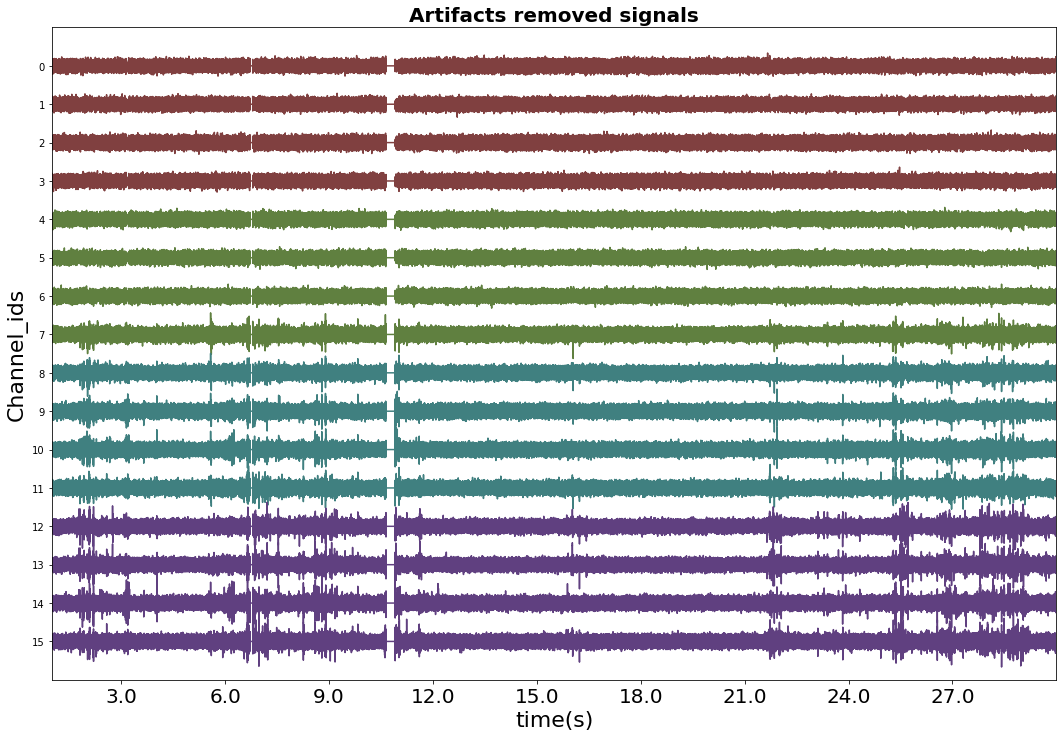

In [21]:
## Identify artifacts, pass them to "list_triggers"
# 'list_triggers': list of list
#    One list per segment of int with the stimulation trigger frames

# Initiate 'recording_ra' with the first channel
a = recording_f.get_traces(channel_ids=[0])
baseline_noise = recording_f.get_traces(channel_ids=[0], 
                                        start_frame=0, 
                                        end_frame=24414)
thr = 10*np.std(baseline_noise)
artifact_frames_p = np.argwhere(a > thr)[:,0]
artifact_frames_n = np.argwhere(a < -thr)[:,0]
artifact_frames = np.append(artifact_frames_p, artifact_frames_n).tolist()

recording_ra = st.remove_artifacts(recording_f, 
                                   list_triggers=artifact_frames,
                                   mode='zeros')

# Apply 'artifacts removal' to the rest channels
for id in recording_f.get_channel_ids()[1:len(recording_f.get_channel_ids())]:
    a = recording_f.get_traces(channel_ids=[id])
    baseline_noise = recording_f.get_traces(channel_ids=[id], 
                                            start_frame=0, 
                                            end_frame=24414)
    thr = 10*np.std(baseline_noise)
    artifact_frames_p = np.argwhere(a > thr)[:,0]
    artifact_frames_n = np.argwhere(a < -thr)[:,0]
    artifact_frames = np.append(artifact_frames_p, artifact_frames_n).tolist()
  
    recording_ra = st.remove_artifacts(recording_ra, 
                                       list_triggers=artifact_frames,
                                       mode='zeros')

# Display traces    
w = sw.plot_timeseries(recording_ra, 
                       channel_ids=recording_ra.get_channel_ids(), 
                       time_range=[1,30], 
                       show_channel_ids=True, 
                       color_groups=True)

w.ax.set_title("Artifacts removed signals", fontsize=20, fontweight='bold')
w.ax.set_xlabel("time(s)",fontsize=22)
w.ax.set_xticklabels(w.ax.get_xticks(), fontsize=20)
w.ax.set_ylabel("Channel_ids",fontsize=22)
w.figure.set_size_inches(18, 12, forward=True)
w.figure.savefig(output_folder + '/Artifacts removed signals.png', dpi=200)


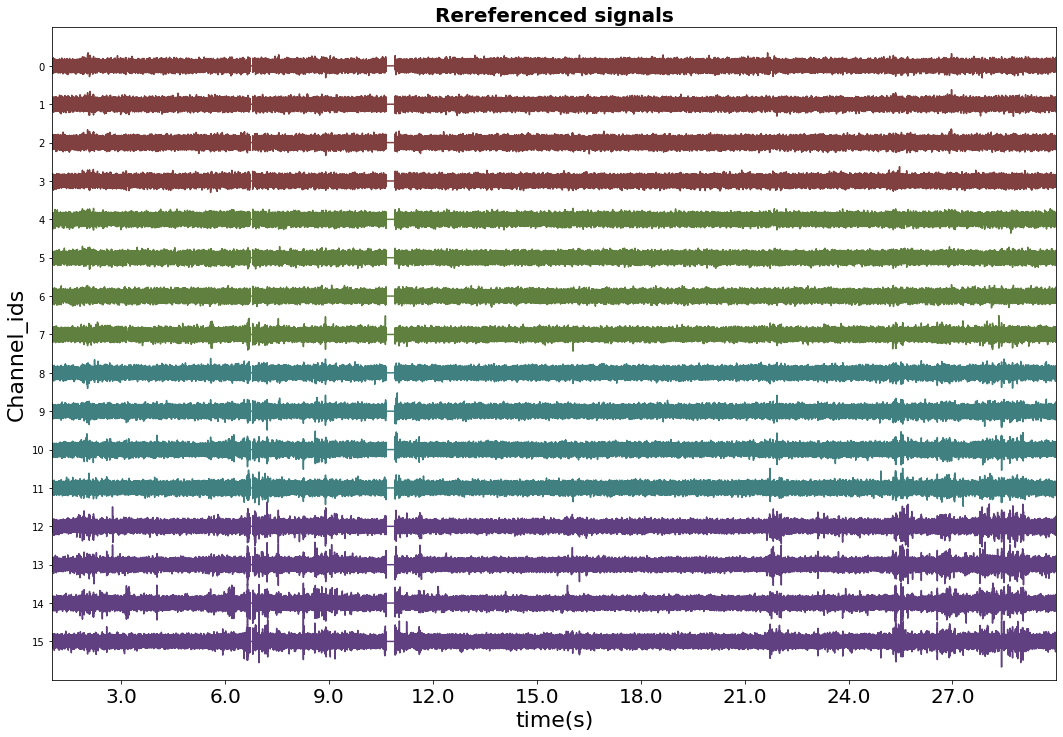

In [22]:
recording_cmr = st.common_reference(recording_ra, reference='global', operator='average')
w = sw.plot_timeseries(recording_cmr, 
                       channel_ids=recording_cmr.get_channel_ids(), 
                       time_range=[1,30], 
                       show_channel_ids=True, 
                       color_groups=True)

# Display traces

w.ax.set_title("Rereferenced signals", fontsize=20, fontweight='bold')
w.ax.set_xlabel("time(s)",fontsize=22)
w.ax.set_xticklabels(w.ax.get_xticks(), fontsize=20)
w.ax.set_ylabel("Channel_ids",fontsize=22)
w.figure.set_size_inches(18, 12, forward=True)
w.figure.savefig(output_folder + '/Rereferenced signals.png', dpi=200)



We can plot the traces after removing the bad channel and applying CMR:

In [23]:
# recording_rb = st.remove_bad_channels(recording_cmr, bad_threshold=6)
# w = sw.plot_timeseries(recording_rb, 
#                        channel_ids=[2,3,4,5,6,7,8], 
#                        time_range=[10,20], 
#                        show_channel_ids=True, 
#                        color_groups=True)
# print(recording_rb.get_channel_ids())
      
# # Display traces

# w.ax.set_title("Bad channel removed signals", fontsize=20, fontweight='bold')
# w.ax.set_xlabel("time(s)",fontsize=22)
# w.ax.set_xticklabels(w.ax.get_xticks(), fontsize=20)
# w.ax.set_ylabel("Channel_ids",fontsize=22)
# w.figure.set_size_inches(18, 12, forward=True)
# w_ts.figure.savefig(output_folder + '/Bad channel removed signals.png', dpi=200)


In [24]:
import shutil

json_path = output_folder + '/recording_json'
if os.path.exists(json_path):
    shutil.rmtree(json_path)

recording_cmr = recording_cmr.save(folder=output_folder + '/recording_json', 
                                 mode_if_folder_exists='overwrite', 
                                 chunk_size=30000, 
                                 progress_bar=True)

write_binary_recording with n_jobs 1  chunk_size 30000


write_binary_recording: 100%|###################| 50/50 [00:01<00:00, 43.76it/s]


In [25]:
# # plot the power spectrum of non-filtered, bandpass filtered and notch filtered signals
# fs = recording.get_sampling_frequency()
# f_raw, p_raw = scipy.signal.welch(recording.get_traces(segment_index=0)[:, 0], fs=fs)
# f_f, p_f = scipy.signal.welch(recording_f.get_traces(segment_index=0)[:, 0], fs=fs)
# #f_notch, p_notch = scipy.signal.welch(recording_notch.get_traces(segment_index=0)[:, 0], fs=fs)

# fig, ax = plt.subplots()
# ax.semilogy(f_raw, p_raw, f_f, p_f)
# ax.set_title('power spectrum of rat array')
# # plt.savefig('/Users/betty_hbr/Dropbox/1_Project3/2_Results/PowerSpectrumofTraces_RatArray')

## Spike sorting

We can retrieve the parameters associated to any sorter with the `get_default_params()` function from the `spikesorters` module:

In [103]:
ss.installed_sorters()

RUNNING SHELL SCRIPT: /var/folders/4p/bs0t5s6d7n5b2xb9lb_92m8h0000gn/T/tmp_shellscript_dfgu1wg/script.sh


/Users/betty_hbr/Applications/anaconda3/envs/si090/lib/python3.8/site-packages/spikeinterface/sorters/ironclust/ironclust.py:152: ResourceWarning: unclosed file <_io.TextIOWrapper name=104 encoding='UTF-8'>
  if check_compiled():


['herdingspikes', 'mountainsort4', 'tridesclous']

In [26]:
ss.get_default_params('mountainsort4')

{'detect_sign': -1,
 'adjacency_radius': -1,
 'freq_min': 300,
 'freq_max': 6000,
 'filter': True,
 'whiten': True,
 'num_workers': 1,
 'clip_size': 50,
 'detect_threshold': 3,
 'detect_interval': 10}

In [27]:
# Run spike sorting on entire recording
sorting_MS = ss.run_mountainsort4(recording_cmr,
                                  detect_threshold=3.5,
                                  output_folder=output_folder+'/mountainsort4_output')
print('Found', len(sorting_MS.get_unit_ids()), 'units')

Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Found 16 units


In [28]:
# print(f'MountainSort4 unit ids: {sorting_MS.get_unit_ids()}')
# print(f'Spike train of a unit: {sorting_MS.get_unit_spike_train(5)}')

MountainSort4 unit ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


/var/folders/4p/bs0t5s6d7n5b2xb9lb_92m8h0000gn/T/ipykernel_31688/2954132327.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  w_rs.ax.set_xticklabels(w_rs.ax.get_xticks(), fontsize=20)


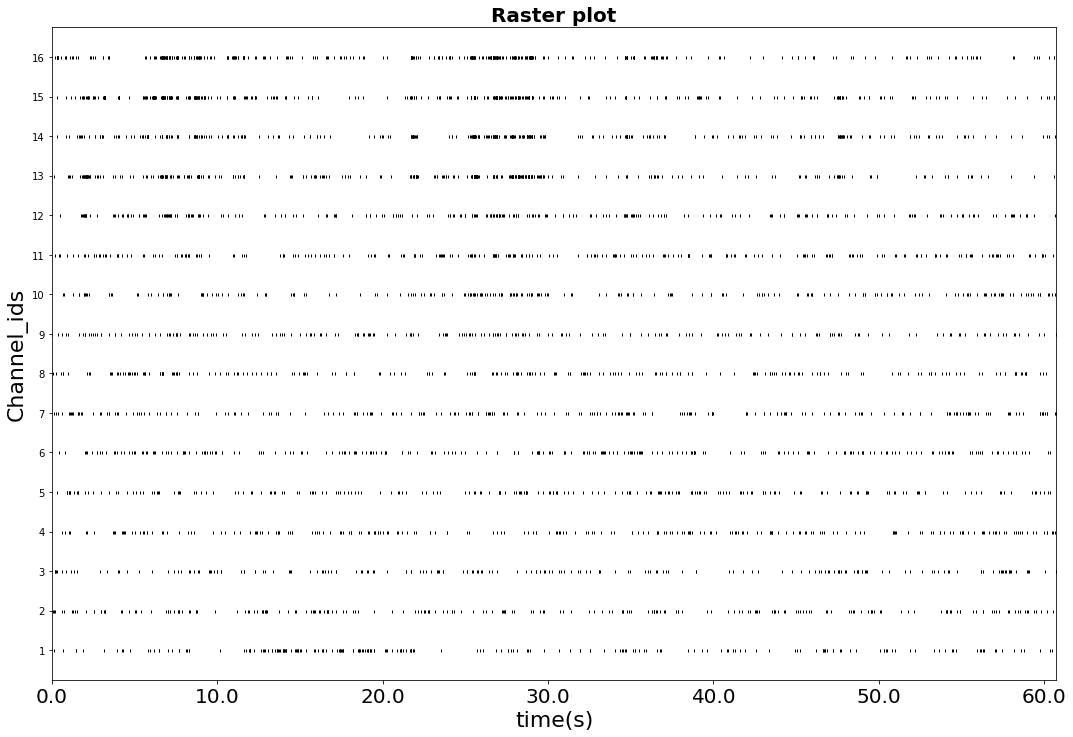

In [30]:
w_rs = sw.plot_rasters(sorting_MS)

# display rasters

w_rs.ax.set_title("Raster plot", fontsize=20, fontweight='bold')
w_rs.ax.set_xlabel("time(s)",fontsize=22)
w_rs.ax.set_xticklabels(w_rs.ax.get_xticks(), fontsize=20)
w_rs.ax.set_ylabel("Channel_ids",fontsize=22)
w_rs.figure.set_size_inches(18, 12, forward=True)
w_rs.figure.savefig(output_folder + '/Raster plot.png', dpi=200)

In [122]:
# Run spike sorting by group
recording=recording_cmr.split_by(property='group', outputs='dict')
print(recording)
working_folder = 'sorter_outputs'
results = ss.run_sorters('mountainsort4', recording, working_folder,
            engine='loop', with_output=True, mode_if_folder_exists='overwrite')

{0: ChannelSliceRecording: 4 channels - 1 segments - 24.4kHz - 60.737s, 1: ChannelSliceRecording: 4 channels - 1 segments - 24.4kHz - 60.737s, 2: ChannelSliceRecording: 4 channels - 1 segments - 24.4kHz - 60.737s, 3: ChannelSliceRecording: 4 channels - 1 segments - 24.4kHz - 60.737s}
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording
Mountainsort4 use the OLD spikeextractors mapped with NewToOldRecording


the output is a dict with all combinations of (group, sorter_name)



In [124]:
from pprint import pprint
pprint(results)

{(0, 'mountainsort4'): NpzSortingExtractor: 4 units - 1 segments - 24.4kHz
  file_path: /Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output/sorter_outputs/0/mountainsort4/firings.npz,
 (1, 'mountainsort4'): NpzSortingExtractor: 4 units - 1 segments - 24.4kHz
  file_path: /Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output/sorter_outputs/1/mountainsort4/firings.npz,
 (2, 'mountainsort4'): NpzSortingExtractor: 4 units - 1 segments - 24.4kHz
  file_path: /Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output/sorter_outputs/2/mountainsort4/firings.npz,
 (3, 'mountainsort4'): NpzSortingExtractor: 4 units - 1 segments - 24.4kHz
  file_path: /Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output/sorter_outputs/3/mountainsort4/firings.npz}


## Extract waveforms

In [31]:
we = si.extract_waveforms(recording_cmr, sorting_MS, 
                          folder=output_folder + '/wf_MS', 
                          ms_before=1.5,
                          ms_after=2.,
                          max_spikes_per_unit=None,
                          progress_bar=True,
                          n_jobs=1, 
                          total_memory="500M", 
                          return_scaled=True,
                          overwrite=True,)
print(we)

Setting 'return_scaled' to False


extract waveforms memmap: 100%|###################| 1/1 [00:00<00:00,  4.64it/s]


WaveformExtractor: 16 channels - 16 units - 1 segments
  before:36 after:48 n_per_units:None


Now, all waveforms are computed and stored in the provided `wf_MS` folder. We can now retrieve waveforms and templates:

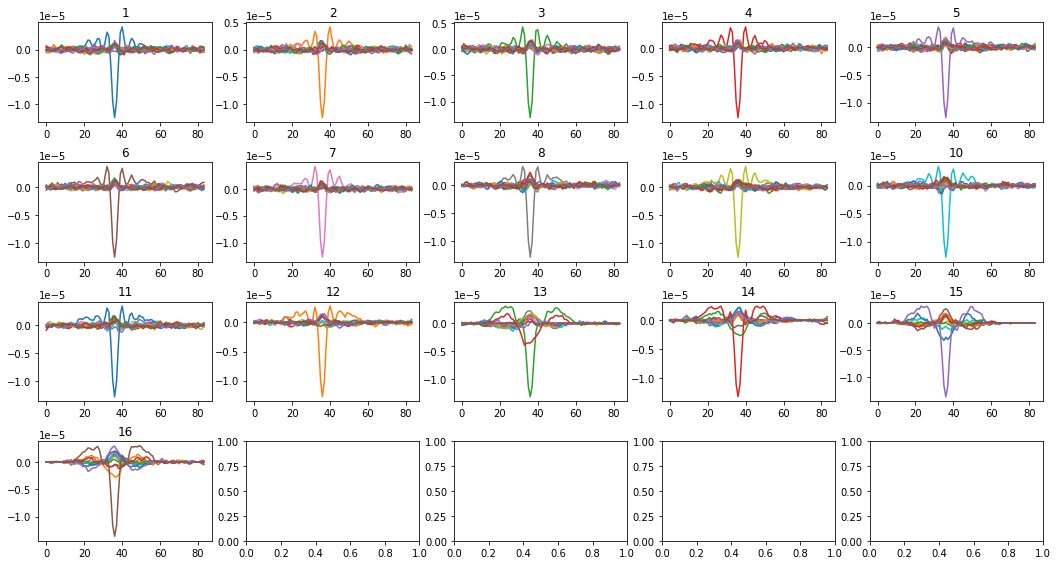

In [32]:
unit_ids = sorting_MS.unit_ids
fig, ax = plt.subplots(nrows=4, ncols=5)
plt.subplots_adjust(bottom=0.1, top=0.7, hspace=.4)

nrows = 4
ncols = 5
for unit_id in unit_ids:
    template = we.get_template(unit_id=unit_id, mode='median')
    plot_id = unit_id-1
    ax[int(plot_id/ncols), int(plot_id%ncols)].plot(template)
    ax[int(plot_id/ncols), int(plot_id%ncols)].set_title(f'{unit_id}')
fig.set_size_inches(18, 12, forward=True)
plt.gcf()
plt.savefig(output_folder + '/Units.png', dpi=200)
plt.show()

For `waveforms`, the dimension is (num_spikes, num_samples, num_channels), while each `template` has dimension (num_samples, num_channels). Note that the number of spikes in this case is 500..we'll get back to it later!

The `WaveformExtractor` is also compatible with several `widgets` to visualize the spike sorting output:

In [33]:
for unit in sorting_MS.get_unit_ids():
    waveforms = we.get_waveforms(unit_id=unit)
    spiketrain = sorting_MS.get_unit_spike_train(unit)
    print(f"Unit {unit} - num waveforms: {waveforms.shape[0]} - num spikes: {len(spiketrain)}")

Unit 1 - num waveforms: 206 - num spikes: 206
Unit 2 - num waveforms: 211 - num spikes: 211
Unit 3 - num waveforms: 184 - num spikes: 184
Unit 4 - num waveforms: 215 - num spikes: 215
Unit 5 - num waveforms: 209 - num spikes: 209
Unit 6 - num waveforms: 233 - num spikes: 233
Unit 7 - num waveforms: 224 - num spikes: 224
Unit 8 - num waveforms: 221 - num spikes: 221
Unit 9 - num waveforms: 208 - num spikes: 208
Unit 10 - num waveforms: 217 - num spikes: 217
Unit 11 - num waveforms: 256 - num spikes: 256
Unit 12 - num waveforms: 266 - num spikes: 266
Unit 13 - num waveforms: 353 - num spikes: 353
Unit 14 - num waveforms: 353 - num spikes: 353
Unit 15 - num waveforms: 388 - num spikes: 388
Unit 16 - num waveforms: 391 - num spikes: 391


## Postprocessing

Postprocessing spike sorting results ranges from computing additional information, such as spike amplitudes and Principal Component Analisys (PCA) scores, to computing features of the extracellular waveforms, similarity between templates and crosscorrelograms. All of this is possible with the `toolkit` module.

### PCA scores

PCA scores can be easily computed with the `compute_principal_components()` function. Similarly to the `extract_waveforms`, the function returns an object of type `WaveformPrincipalComponent` that allows to retrieve all pc scores on demand.

In [34]:
pc = st.compute_principal_components(we, n_components=3)

In [35]:
pc0 = pc.get_components(unit_id=10)
print(f"PC scores shape: {pc0.shape}")
all_labels, all_pcs = pc.get_all_components()
print(f"All PC scores shape: {all_pcs.shape}")

PC scores shape: (217, 3, 16)
All PC scores shape: (4135, 3, 16)


/Users/betty_hbr/Applications/anaconda3/envs/si090/lib/python3.8/site-packages/spikeinterface/toolkit/postprocessing/principal_component.py:103: DeprecationWarning: The 'get_components()' function has been substituted by the 'get_projections()' function and it will be removed in the next release
  warnings.warn("The 'get_components()' function has been substituted by the 'get_projections()' "
/Users/betty_hbr/Applications/anaconda3/envs/si090/lib/python3.8/site-packages/spikeinterface/toolkit/postprocessing/principal_component.py:196: DeprecationWarning: The 'get_all_components()' function has been substituted by the 'get_all_projections()' function and it will be removed in the next release
  warnings.warn("The 'get_all_components()' function has been substituted by the 'get_all_projections()' "


For pc scores of a single unit, the dimension is (num_spikes, num_components, num_channels). 
The `get_all_components()` function returns an array with the label/unit id for each component (`all_labels`) and an array of dimension (num_all_samples, num_components, num_channels). 

### Spike amplitudes

Spike amplitudes can be computed with the `get_spike_amplitudes` function.

In [59]:
amplitudes = st.compute_spike_amplitudes(we, 
                                     peak_sign='neg', 
                                     return_scaled=True,
                                     outputs='concatenated')
print(np.array(amplitudes)*1e6) # spike amplitude in uV

Setting 'return_scaled' to False
[[-12.111913 -12.451261 -13.112103 ... -13.363481 -14.74057  -12.590613]]


By default, all amplitudes are concatenated in one array.

The correspinding spike times and labels can be easily retrieved as:

In [60]:
all_spike_times, all_spike_labels = sorting_MS.get_all_spike_trains()[0]

The [0] index is to select the first segment. In case of multiple segments each element will correspond to a different segment and will contain spike times and labels for that segment.


### Compute template metrics

Template metrics, or extracellular features, such as peak to valley duration or full-width half maximum, are important to classify neurons into putative classes (excitatory - inhibitory). The `toolkit` allows one to compute several of these metrics:

In [61]:
print(st.get_template_metric_names())

['peak_to_valley', 'peak_trough_ratio', 'half_width', 'repolarization_slope', 'recovery_slope']


In [62]:
template_metrics = st.calculate_template_metrics(we)
display(template_metrics)

,peak_to_valley,peak_trough_ratio,half_width,repolarization_slope,recovery_slope
1,0.000152,-0.329719,0.000123,0.138288,-0.001798
2,0.000156,-0.321892,0.000123,0.140712,-0.001582
3,0.000152,-0.305813,0.000127,0.144593,-0.001687
4,0.000152,-0.309841,0.000123,0.138244,-0.002746
5,0.000152,-0.279618,0.000127,0.140439,-0.001505
6,0.000152,-0.267933,0.000127,0.135983,-0.001303
7,0.000152,-0.304168,0.000123,0.141276,-0.002851
8,0.000152,-0.236372,0.000131,0.141642,-0.000897
9,0.000156,-0.293571,0.000131,0.137879,-0.002012
10,0.000156,-0.230717,0.000131,0.136619,-0.001534


For more information about these template metrics, we refer to this [documentation](https://github.com/AllenInstitute/ecephys_spike_sorting/tree/master/ecephys_spike_sorting/modules/mean_waveforms) from the Allen Institute.

## 7.Validation and curation <a class="anchor" id="curation"></a>

The `toolkit` module also provides several functions to compute qualitity metrics to validate the spike sorting results.

Let's see what metrics are available:

In [63]:
print(st.get_quality_metric_list())

['num_spikes', 'firing_rate', 'presence_ratio', 'snr', 'isi_violation', 'amplitude_cutoff']


In [73]:
# qc = st.compute_quality_metrics(we, waveform_principal_component=pc)
# display(qc)
qc = st.compute_quality_metrics(we)
display(qc)

/Users/betty_hbr/Applications/anaconda3/envs/si090/lib/python3.8/site-packages/spikeinterface/toolkit/qualitymetrics/misc_metrics.py:313: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  pdf = scipy.ndimage.filters.gaussian_filter1d(h, histogram_smoothing_value)


,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_rate,isi_violations_count,amplitude_cutoff,isolation_distance,l_ratio,d_prime
1,206,3.391661,0.75,3.958425,0.477089,0.016464,1,0.010796,125.445242,0.005766,5.253542
2,211,3.473983,0.84,3.954582,0.000000,0.000000,0,0.005900,94.854184,0.017101,4.856362
3,184,3.029445,0.84,3.929878,0.597995,0.016464,1,0.001418,101.337871,0.010775,4.964726
4,215,3.539840,0.90,3.921177,0.875965,0.032929,2,0.004080,116.237451,0.008728,4.949142
5,209,3.441054,0.88,3.913901,0.000000,0.000000,0,0.010228,92.676004,0.019128,4.615935
6,233,3.836199,0.90,3.967900,0.372925,0.016464,1,0.016800,90.648290,0.028566,4.791228
7,224,3.688020,0.86,3.914210,0.403494,0.016464,1,0.001155,88.628776,0.028979,4.673341
8,221,3.638627,0.87,4.131556,0.829047,0.032929,2,0.002090,62.461963,0.312693,3.405123
9,208,3.424590,0.93,4.001935,0.000000,0.000000,0,0.023054,61.455875,0.328935,3.291100
10,217,3.572769,0.84,4.024749,0.000000,0.000000,0,0.008251,53.500513,0.842735,2.715249


For more information about these waveform features, we refer to this [documentation](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html) from the Allen Institute.

## Automatic curation based on quality metrics

A viable option to curate (or at least pre-curate) a spike sorting output is to filter units based on quality metrics. As we have already computed quality metrics a few lines above, we can simply filter the `qc` dataframe based on some thresholds.

Here, we'll only keep units with an SNR > 5 and an ISI violation threshold < 0.2:

In [74]:
snr_thresh = 3
isi_viol_thresh = 0.2

A straightforward way to filter a pandas dataframe is via the `query`.
We first define our query (make sure the names match the column names of the dataframe):

In [75]:
our_query = f"snr > {snr_thresh} & isi_violations_rate < {isi_viol_thresh}"
print(our_query)

snr > 3 & isi_violations_rate < 0.2


and then we can use the query to select units:

In [76]:
keep_units = qc.query(our_query)
keep_unit_ids = keep_units.index.values

In [77]:
sorting_auto = sorting_MS.select_units(keep_unit_ids)
print(f"Number of units before curation: {len(sorting_MS.get_unit_ids())}")
print(f"Number of units after curation: {len(sorting_auto.get_unit_ids())}")

Number of units before curation: 16
Number of units after curation: 12


In [79]:
we_c = si.extract_waveforms(recording_cmr, sorting_auto, 
                          folder="wf_MS_post", 
                          ms_before=1.5,
                          ms_after=2,
                          max_spikes_per_unit=None,
                          progress_bar=True,
                          n_jobs=1, 
                          total_memory="500M", 
                          return_scaled=True,
                          overwrite=True,)
print(we_c)

Setting 'return_scaled' to False


extract waveforms memmap: 100%|###################| 1/1 [00:00<00:00,  4.38it/s]


WaveformExtractor: 16 channels - 12 units - 1 segments
  before:36 after:48 n_per_units:None


In [80]:
sorting_MS.get_unit_ids()
sorting_auto.get_unit_ids()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Waveforms shape: (215, 84, 16)
Template shape: (84, 16)
All templates shape: (12, 84, 16)


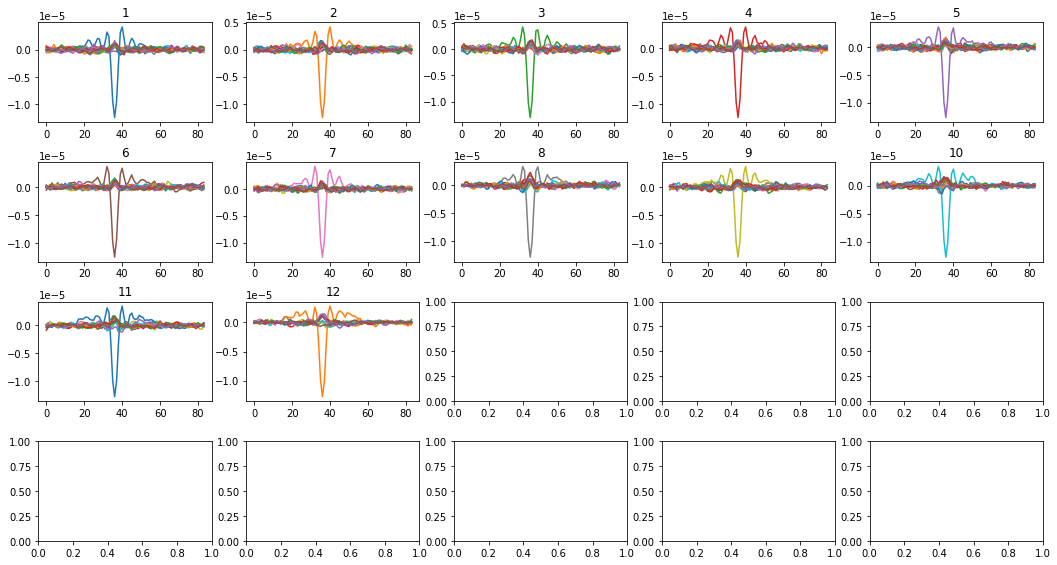

In [82]:
waveforms0 = we_c.get_waveforms(unit_id=4)
print(f"Waveforms shape: {waveforms0.shape}")
template0 = we_c.get_template(unit_id=4)
print(f"Template shape: {template0.shape}")
all_templates = we_c.get_all_templates()
print(f"All templates shape: {all_templates.shape}")

# unit_ids = sorting_auto.unit_ids
# for unit_id in unit_ids:
#     fig, ax = plt.subplots()
#     template = we.get_template(unit_id=unit_id, mode='median')
#     print(template.shape)
#     ax.plot(template)
#     ax.set_title(f'{unit_id}')
# plt.show()

unit_ids = sorting_auto.unit_ids
fig, ax = plt.subplots(nrows=4, ncols=5)
plt.subplots_adjust(bottom=0.1, top=0.7, hspace=.4)

nrows = 4
ncols = 5
for unit_id in unit_ids:
    template = we.get_template(unit_id=unit_id, mode='median')
    plot_id = unit_id-1
    ax[int(plot_id/ncols), int(plot_id%ncols)].plot(template)
    ax[int(plot_id/ncols), int(plot_id%ncols)].set_title(f'{unit_id}')
fig.set_size_inches(18, 12, forward=True)
plt.gcf()
plt.savefig(output_folder + '/Units after curation.png', dpi=200)
plt.show()

## Export to Phy for manual curation

To perform manual curation we can export the data to [Phy](https://github.com/cortex-lab/phy). 
In order to use "phy", a conda environment named "spikeSorting" shall be activated independently.
Open `phy_gui` with `phy template-gui  /Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output/phy_MS/params.py`

In [83]:
from spikeinterface.exporters import export_to_phy

In [85]:
export_to_phy(we_c, output_folder='phy_MS',
              progress_bar=True, total_memory='100M')

write_binary_recording with n_jobs 1  chunk_size 1562500


write_binary_recording: 100%|#####################| 1/1 [00:00<00:00,  1.69it/s]


Setting 'return_scaled' to False


extract PCs: 100%|################################| 1/1 [00:03<00:00,  3.20s/it]

Run:
phy template-gui  /Users/betty_hbr/Dropbox/1_Project3/2_Workspace/SpikeInterface_output/phy_MS/params.py


In [ ]:
%%capture --no-display
!phy template-gui phy_MS/params.py

After curating the results we can reload it using the `PhySortingExtractor` and exclude the units that we labeled as `noise`:

In [90]:
sorting_MS_phy_curated = se.PhySortingExtractor('phy_MS/', exclude_cluster_groups=['noise','mua'])

In [93]:
print(f"Number of units before curation: {len(sorting_auto.get_unit_ids())}")
# in manual curation, 3 units were labeled as noise:
print(f"Number of units after curation: {len(sorting_MS_phy_curated.get_unit_ids())}")

Number of units before curation: 12
Number of units after curation: 11


In [92]:
sorting_MS_phy_curated.get_unit_ids()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12])

## Export spike sorting result

In [ ]:
from spikeinterface.exporters import export_report
export_report(waveform_extractor=we_c, output_folder=output_folder+"SI_report", format="pdf", 
              metrics=qc)

In [ ]:
!ls SI_report